In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from alpha_vantage.timeseries import TimeSeries
import requests

In [2]:
ts = TimeSeries("6U6XV7041LPSX6FNt", output_format='pandas')
data, meta = ts.get_intraday('NFLX', interval='1min', outputsize='full')

In [3]:
meta

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'NFLX',
 '3. Last Refreshed': '2021-02-17 19:31:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [4]:
data.head()

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2021-02-04 04:26:00,543.16,543.1600,543.16,543.1600,349.0
2021-02-04 06:54:00,541.45,541.4500,541.45,541.4500,209.0
2021-02-04 07:00:00,540.00,540.0000,540.00,540.0000,227.0
2021-02-04 07:02:00,541.00,541.0000,541.00,541.0000,200.0
2021-02-04 08:01:00,541.00,541.4499,540.72,541.4499,1512.0


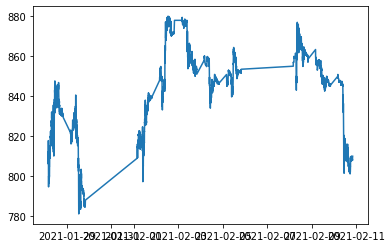

In [13]:
plt.plot(data['4. close'])

In [14]:
columns = ['open', 'high', 'low', 'close', 'volume']
data.columns = columns

In [17]:
data['TradeDate'] = data.index.date
data['time'] = data.index.time

data.loc['2021-02-10']

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2021-02-10 20:00:00,809.16,809.8899,808.99,809.8899,8342.0,2021-02-10,20:00:00
2021-02-10 19:59:00,809.20,809.2000,809.00,809.0000,1888.0,2021-02-10,19:59:00
2021-02-10 19:58:00,809.00,809.1700,809.00,809.0000,3752.0,2021-02-10,19:58:00
2021-02-10 19:57:00,809.45,809.4500,809.00,809.0000,4371.0,2021-02-10,19:57:00
2021-02-10 19:55:00,809.00,809.0000,809.00,809.0000,1362.0,2021-02-10,19:55:00
...,...,...,...,...,...,...,...
2021-02-10 04:13:00,849.50,849.5000,849.50,849.5000,602.0,2021-02-10,04:13:00
2021-02-10 04:12:00,850.00,850.0000,850.00,850.0000,516.0,2021-02-10,04:12:00
2021-02-10 04:07:00,849.50,849.5000,849.50,849.5000,545.0,2021-02-10,04:07:00


In [18]:
market = data.between_time('09:30:00', '16:00:00').copy()
market.sort_index(inplace=True)

market.groupby('TradeDate').agg({'low':min, 'high':max})

,low,high
TradeDate,,
2021-01-28,801.0000,848.00
2021-01-29,780.1000,842.41
2021-02-01,795.5601,842.00
2021-02-02,842.2006,880.50
2021-02-03,853.0646,878.08
2021-02-04,833.4200,856.50
2021-02-05,838.9700,864.77
2021-02-08,854.7500,877.77
2021-02-09,841.7500,859.80


In [22]:
market.loc[market.groupby('TradeDate')['low'].idxmin()]


,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2021-01-28 09:31:00,820.0000,820.0000,801.0000,812.0000,1183976.0,2021-01-28,09:31:00
2021-01-29 12:47:00,781.3200,786.6000,780.1000,783.0461,421043.0,2021-01-29,12:47:00
2021-02-01 09:55:00,800.6600,800.7700,795.5601,797.1500,262101.0,2021-02-01,09:55:00
2021-02-02 09:34:00,844.5500,845.3800,842.2006,843.8250,105631.0,2021-02-02,09:34:00
2021-02-03 10:31:00,853.5700,855.3350,853.0646,854.7950,84717.0,2021-02-03,10:31:00
2021-02-04 10:38:00,834.7800,835.9799,833.4200,834.0000,152607.0,2021-02-04,10:38:00
2021-02-05 09:38:00,839.3600,842.5500,838.9700,842.4390,77973.0,2021-02-05,09:38:00
2021-02-08 14:20:00,856.1700,856.7200,854.7500,854.8900,86182.0,2021-02-08,14:20:00
2021-02-09 13:55:00,844.1900,844.1900,841.7500,843.1900,63910.0,2021-02-09,13:55:00


In [23]:
market.loc[market.groupby('TradeDate')['high'].idxmax()]

,open,high,low,close,volume,TradeDate,time
date,,,,,,,
2021-01-28 11:07:00,847.800,848.00,845.5850,846.8892,75902.0,2021-01-28,11:07:00
2021-01-29 09:32:00,838.500,842.41,837.1243,838.9900,140832.0,2021-01-29,09:32:00
2021-02-01 16:00:00,841.730,842.00,839.6000,840.0166,192381.0,2021-02-01,16:00:00
2021-02-02 12:58:00,879.700,880.50,879.2300,880.0450,254432.0,2021-02-02,12:58:00
2021-02-03 09:31:00,877.020,878.08,873.8000,875.0700,298839.0,2021-02-03,09:31:00
2021-02-04 09:31:00,855.000,856.50,852.0000,853.0797,243708.0,2021-02-04,09:31:00
2021-02-05 11:48:00,862.790,864.77,862.7438,864.4101,131557.0,2021-02-05,11:48:00
2021-02-08 09:36:00,874.280,877.77,871.5000,871.9350,249245.0,2021-02-08,09:36:00
2021-02-09 09:36:00,858.250,859.80,857.2997,857.6100,131538.0,2021-02-09,09:36:00
